# Exercise 5: Visualising K-NN Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We need to replace the species strings with indices to allow plotting of the prediction boundaries

In [3]:
labelled_species = [
    'Iris-setosa',
    'Iris-versicolor',
    'Iris-virginica',
]

for idx, label in enumerate(labelled_species):
    df.Species = df.Species.replace(label, idx)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
model = KNN(n_neighbors=3)
model.fit(X=df[['Sepal Length', 'Petal Width']], y=df.Species)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

We need to construct the prediction space to allow for the visualisation of class allocations, to do this we will create a matrix or mesh of *Petal Width*, *Sepal Length* coordinates the is slight greater and less than the corresponding maximum and minimum values for each.  Creating a range of values for *Petal Width* and *Sepal Length* with a spacing of 0.1mm.

In [5]:
spacing = 0.1 # 0.1mm
petal_range = np.arange(df['Petal Width'].min() - 1, df['Petal Width'].max() + 1, spacing)
sepal_range = np.arange(df['Sepal Length'].min() - 1, df['Sepal Length'].max() + 1, spacing)

Mix the two ranges into a mesh

In [6]:
xx, yy = np.meshgrid(sepal_range, petal_range) # Create the mesh

In [7]:
pred_x = np.c_[xx.ravel(), yy.ravel()] # Concatenate the results

In [8]:
pred_y = model.predict(pred_x).reshape(xx.shape)

In [9]:
# Create color maps
cmap_light = ListedColormap(['#F6A56F', '#6FF6A5', '#A56FF6'])
cmap_bold = ListedColormap(['#E6640E', '#0EE664', '#640EE6'])

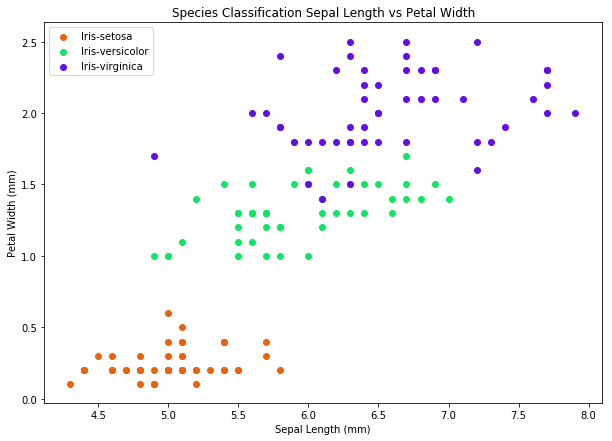

In [10]:
plt.figure(figsize=(10, 7))
for name, group in df.groupby('Species'):
    plt.scatter(group['Sepal Length'], group['Petal Width'],
                c=cmap_bold.colors[name], label=labelled_species[name])
    
plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();


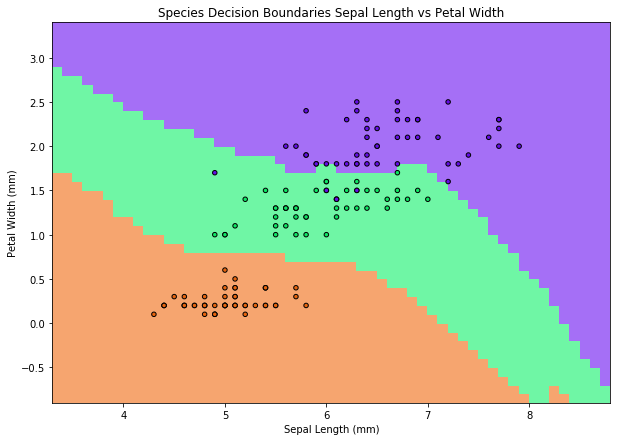

In [11]:
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, pred_y, cmap=cmap_light);
plt.scatter(df['Sepal Length'], df['Petal Width'], c=df.Species, cmap=cmap_bold, edgecolor='k', s=20);
plt.title('Species Decision Boundaries Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');